In [ ]:
### Mandatory
import pandas as pd
import numpy as np

### Plotting
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import plotly.express as px

### Collab and options
from google.colab import drive
import sys
drive.mount('/content/gdrive')
pd. set_option('display.max_rows', 500)
pd. set_option('display.max_columns', 500)
np.set_printoptions(threshold=sys.maxsize)
import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Database scheme ![image](https://storage.googleapis.com/kaggle-media/competitions/home-credit/home_credit.png)

[Kernel used as base](https://www.kaggle.com/code/gpreda/home-credit-default-risk-extensive-eda)

In [ ]:
PATH = "/content/gdrive/MyDrive/Projet+Mise+en+prod+-+home-credit-default-risk/"

In [ ]:
application_train = pd.read_csv(PATH+"/application_train.csv")
application_test = pd.read_csv(PATH+"/application_test.csv")
bureau = pd.read_csv(PATH+"/bureau.csv")
bureau_balance = pd.read_csv(PATH+"/bureau_balance.csv")
credit_card_balance = pd.read_csv(PATH+"/credit_card_balance.csv")
installments_payments = pd.read_csv(PATH+"/installments_payments.csv")
previous_application = pd.read_csv(PATH+"/previous_application.csv")
POS_CASH_balance = pd.read_csv(PATH+"/POS_CASH_balance.csv")

In [ ]:
print("application_train -  rows:",application_train.shape[0]," columns:", application_train.shape[1])
print("application_test -  rows:",application_test.shape[0]," columns:", application_test.shape[1])
print("bureau -  rows:",bureau.shape[0]," columns:", bureau.shape[1])
print("bureau_balance -  rows:",bureau_balance.shape[0]," columns:", bureau_balance.shape[1])
print("credit_card_balance -  rows:",credit_card_balance.shape[0]," columns:", credit_card_balance.shape[1])
print("installments_payments -  rows:",installments_payments.shape[0]," columns:", installments_payments.shape[1])
print("previous_application -  rows:",previous_application.shape[0]," columns:", previous_application.shape[1])
print("POS_CASH_balance -  rows:",POS_CASH_balance.shape[0]," columns:", POS_CASH_balance.shape[1])

application_train -  rows: 307511  columns: 122
application_test -  rows: 48744  columns: 121
bureau -  rows: 1716428  columns: 17
bureau_balance -  rows: 27299925  columns: 3
credit_card_balance -  rows: 3840312  columns: 23
installments_payments -  rows: 13605401  columns: 8
previous_application -  rows: 1670214  columns: 37
POS_CASH_balance -  rows: 10001358  columns: 8
application_train -  rows: 307511  columns: 122
application_test -  rows: 48744  columns: 121
bureau -  rows: 1716428  columns: 17
bureau_balance -  rows: 27299925  columns: 3
credit_card_balance -  rows: 3840312  columns: 23
installments_payments -  rows: 13605401  columns: 8
previous_application -  rows: 1670214  columns: 37
POS_CASH_balance -  rows: 10001358  columns: 8


In [ ]:
def Explo(df):
  EDA = pd.DataFrame(columns = ['Columns','Types','Values', 'Uniques', 'Uniques(no nulls)', 'Missing(n)', 'Missing(%)'])
  eda = pd.DataFrame()

  for c in df.columns:
      eda['Columns'] = [c]
      eda['Types'] = df[c].dtypes
      eda['Values'] = [df[c].unique()]
      eda['Uniques'] = len(list(df[c].unique()))
      eda['Uniques(no nulls)'] = int(df[c].nunique())
      eda['Missing(n)'] = df[c].isnull().sum()
      eda['Missing(%)'] = (df[c].isnull().sum()/ len(df)).round(3)*100
      EDA = EDA.append(eda)
  return EDA.sort_values(by ='Missing(%)', ascending = False)

def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = application_train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = application_train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show()

def plot_distribution(feature,color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    sns.distplot(application_train[feature].dropna(),color=color, kde=True,bins=100)
    plt.show()   

def plot_distribution_comp(var,nrow=2):
    
    i = 0
    t1 = application_train.loc[application_train['TARGET'] != 0]
    t0 = application_train.loc[application_train['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(12,6*nrow))

    for feature in var:
        i += 1
        plt.subplot(nrow,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show()

In [ ]:
Explo(application_train)

,Columns,Types,Values,Uniques,Uniques(no nulls),Missing(n),Missing(%)
0,COMMONAREA_MEDI,float64,"[0.0144, 0.0608, nan, 0.0585, 0.115, 0.0018, 0...",3203,3202,214865,69.9
0,COMMONAREA_AVG,float64,"[0.0143, 0.0605, nan, 0.0582, 0.1143, 0.0018, ...",3182,3181,214865,69.9
0,COMMONAREA_MODE,float64,"[0.0144, 0.0497, nan, 0.0587, 0.1153, 0.0018, ...",3129,3128,214865,69.9
0,NONLIVINGAPARTMENTS_MODE,float64,"[0.0, nan, 0.0195, 0.0078, 0.0039, 0.0661, 0.1...",168,167,213514,69.4
0,NONLIVINGAPARTMENTS_AVG,float64,"[0.0, 0.0039, nan, 0.0193, 0.0077, 0.0019, 0.0...",387,386,213514,69.4
0,NONLIVINGAPARTMENTS_MEDI,float64,"[0.0, 0.0039, nan, 0.0194, 0.0078, 0.0019, 0.0...",215,214,213514,69.4
0,LIVINGAPARTMENTS_MODE,float64,"[0.022, 0.079, nan, 0.1313, 0.3113, 0.0248, 0....",737,736,210199,68.4
0,LIVINGAPARTMENTS_AVG,float64,"[0.0202, 0.0773, nan, 0.1202, 0.2849, 0.0227, ...",1869,1868,210199,68.4
0,FONDKAPREMONT_MODE,object,"[reg oper account, nan, org spec account, reg ...",5,4,210295,68.4
0,LIVINGAPARTMENTS_MEDI,float64,"[0.0205, 0.0787, nan, 0.1223, 0.2899, 0.0231, ...",1098,1097,210199,68.4


In [ ]:
Explo(application_test)

,Columns,Types,Values,Uniques,Uniques(no nulls),Missing(n),Missing(%)
0,SK_ID_CURR,int64,"[100001, 100005, 100013, 100028, 100038, 10004...",48744,48744,0,0.0
0,NAME_CONTRACT_TYPE,object,"[Cash loans, Revolving loans]",2,2,0,0.0
0,CODE_GENDER,object,"[F, M]",2,2,0,0.0
0,FLAG_OWN_CAR,object,"[N, Y]",2,2,0,0.0
0,FLAG_OWN_REALTY,object,"[Y, N]",2,2,0,0.0
0,CNT_CHILDREN,int64,"[0, 2, 1, 3, 8, 4, 6, 5, 7, 20, 11]",11,11,0,0.0
0,AMT_INCOME_TOTAL,float64,"[135000.0, 99000.0, 202500.0, 315000.0, 180000...",606,606,0,0.0
0,AMT_CREDIT,float64,"[568800.0, 222768.0, 663264.0, 1575000.0, 6255...",2937,2937,0,0.0
0,AMT_ANNUITY,float64,"[20560.5, 17370.0, 69777.0, 49018.5, 32067.0, ...",7492,7491,24,0.0
0,AMT_GOODS_PRICE,float64,"[450000.0, 180000.0, 630000.0, 1575000.0, 6255...",677,677,0,0.0


,Columns,Types,Values,Uniques,Uniques(no nulls),Missing(n),Missing(%)
0,SK_ID_CURR,int64,"[100001, 100005, 100013, 100028, 100038, 10004...",48744,48744,0,0.0
0,NAME_CONTRACT_TYPE,object,"[Cash loans, Revolving loans]",2,2,0,0.0
0,CODE_GENDER,object,"[F, M]",2,2,0,0.0
0,FLAG_OWN_CAR,object,"[N, Y]",2,2,0,0.0
0,FLAG_OWN_REALTY,object,"[Y, N]",2,2,0,0.0
0,CNT_CHILDREN,int64,"[0, 2, 1, 3, 8, 4, 6, 5, 7, 20, 11]",11,11,0,0.0
0,AMT_INCOME_TOTAL,float64,"[135000.0, 99000.0, 202500.0, 315000.0, 180000...",606,606,0,0.0
0,AMT_CREDIT,float64,"[568800.0, 222768.0, 663264.0, 1575000.0, 6255...",2937,2937,0,0.0
0,AMT_ANNUITY,float64,"[20560.5, 17370.0, 69777.0, 49018.5, 32067.0, ...",7492,7491,24,0.0
0,AMT_GOODS_PRICE,float64,"[450000.0, 180000.0, 630000.0, 1575000.0, 6255...",677,677,0,0.0


In [ ]:
Explo(bureau)

,Columns,Types,Values,Uniques,Uniques(no nulls),Missing(n),Missing(%)
0,SK_ID_CURR,int64,"[215354, 162297, 402440, 238881, 222183, 42615...",305811,305811,0,0.0
0,SK_ID_BUREAU,int64,"[5714462, 5714463, 5714464, 5714465, 5714466, ...",1716428,1716428,0,0.0
0,CREDIT_ACTIVE,object,"[Closed, Active, Sold, Bad debt]",4,4,0,0.0
0,CREDIT_CURRENCY,object,"[currency 1, currency 2, currency 4, currency 3]",4,4,0,0.0
0,DAYS_CREDIT,int64,"[-497, -208, -203, -629, -273, -43, -1896, -11...",2923,2923,0,0.0
0,CREDIT_DAY_OVERDUE,int64,"[0, 2603, 6, 30, 2156, 496, 186, 2264, 41, 8, ...",942,942,0,0.0
0,DAYS_CREDIT_ENDDATE,float64,"[-153.0, 1075.0, 528.0, nan, 1197.0, 27460.0, ...",14097,14096,105553,6.1
0,DAYS_ENDDATE_FACT,float64,"[-153.0, nan, -1710.0, -840.0, -825.0, -187.0,...",2918,2917,633653,36.9
0,AMT_CREDIT_MAX_OVERDUE,float64,"[nan, 77674.5, 0.0, 14985.0, 310.5, 20493.27, ...",68252,68251,1124488,65.5
0,CNT_CREDIT_PROLONG,int64,"[0, 2, 1, 4, 3, 5, 9, 8, 6, 7]",10,10,0,0.0


,Columns,Types,Values,Uniques,Uniques(no nulls),Missing(n),Missing(%)
0,SK_ID_CURR,int64,"[215354, 162297, 402440, 238881, 222183, 42615...",305811,305811,0,0.0
0,SK_ID_BUREAU,int64,"[5714462, 5714463, 5714464, 5714465, 5714466, ...",1716428,1716428,0,0.0
0,CREDIT_ACTIVE,object,"[Closed, Active, Sold, Bad debt]",4,4,0,0.0
0,CREDIT_CURRENCY,object,"[currency 1, currency 2, currency 4, currency 3]",4,4,0,0.0
0,DAYS_CREDIT,int64,"[-497, -208, -203, -629, -273, -43, -1896, -11...",2923,2923,0,0.0
0,CREDIT_DAY_OVERDUE,int64,"[0, 2603, 6, 30, 2156, 496, 186, 2264, 41, 8, ...",942,942,0,0.0
0,DAYS_CREDIT_ENDDATE,float64,"[-153.0, 1075.0, 528.0, nan, 1197.0, 27460.0, ...",14097,14096,105553,6.1
0,DAYS_ENDDATE_FACT,float64,"[-153.0, nan, -1710.0, -840.0, -825.0, -187.0,...",2918,2917,633653,36.9
0,AMT_CREDIT_MAX_OVERDUE,float64,"[nan, 77674.5, 0.0, 14985.0, 310.5, 20493.27, ...",68252,68251,1124488,65.5
0,CNT_CREDIT_PROLONG,int64,"[0, 2, 1, 4, 3, 5, 9, 8, 6, 7]",10,10,0,0.0


In [ ]:
Explo(bureau_balance)

,Columns,Types,Values,Uniques,Uniques(no nulls),Missing(n),Missing(%)
0,SK_ID_BUREAU,int64,"[5715448, 5715449, 5715451, 5715452, 5715453, ...",817395,817395,0,0.0
0,MONTHS_BALANCE,int64,"[0, -1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -...",97,97,0,0.0
0,STATUS,object,"[C, 0, X, 1, 2, 3, 5, 4]",8,8,0,0.0


,Columns,Types,Values,Uniques,Uniques(no nulls),Missing(n),Missing(%)
0,SK_ID_BUREAU,int64,"[5715448, 5715449, 5715451, 5715452, 5715453, ...",817395,817395,0,0.0
0,MONTHS_BALANCE,int64,"[0, -1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -...",97,97,0,0.0
0,STATUS,object,"[C, 0, X, 1, 2, 3, 5, 4]",8,8,0,0.0


In [ ]:
Explo(credit_card_balance)

,Columns,Types,Values,Uniques,Uniques(no nulls),Missing(n),Missing(%)
0,SK_ID_PREV,int64,"[2562384, 2582071, 1740877, 1389973, 1891521, ...",104307,104307,0,0.0
0,SK_ID_CURR,int64,"[378907, 363914, 371185, 337855, 126868, 38001...",103558,103558,0,0.0
0,MONTHS_BALANCE,int64,"[-6, -1, -7, -4, -5, -3, -2, -19, -13, -18, -1...",96,96,0,0.0
0,AMT_BALANCE,float64,"[56.97, 63975.555, 31815.225, 236572.11, 45391...",1347904,1347904,0,0.0
0,AMT_CREDIT_LIMIT_ACTUAL,int64,"[135000, 45000, 450000, 225000, 270000, 585000...",181,181,0,0.0
0,AMT_DRAWINGS_ATM_CURRENT,float64,"[0.0, 2250.0, 67500.0, 45000.0, 90000.0, 76500...",2268,2267,749816,19.5
0,AMT_DRAWINGS_CURRENT,float64,"[877.5, 2250.0, 0.0, 11547.0, 67500.0, 45000.0...",187005,187005,0,0.0
0,AMT_DRAWINGS_OTHER_CURRENT,float64,"[0.0, 137700.0, nan, 177840.0, 46800.0, 187200...",1833,1832,749816,19.5
0,AMT_DRAWINGS_POS_CURRENT,float64,"[877.5, 0.0, 11547.0, 199339.425, 34526.7, 968...",168749,168748,749816,19.5
0,AMT_INST_MIN_REGULARITY,float64,"[1700.325, 2250.0, 11795.76, 22924.89, 4449.10...",312267,312266,305236,7.9


,Columns,Types,Values,Uniques,Uniques(no nulls),Missing(n),Missing(%)
0,SK_ID_PREV,int64,"[2562384, 2582071, 1740877, 1389973, 1891521, ...",104307,104307,0,0.0
0,SK_ID_CURR,int64,"[378907, 363914, 371185, 337855, 126868, 38001...",103558,103558,0,0.0
0,MONTHS_BALANCE,int64,"[-6, -1, -7, -4, -5, -3, -2, -19, -13, -18, -1...",96,96,0,0.0
0,AMT_BALANCE,float64,"[56.97, 63975.555, 31815.225, 236572.11, 45391...",1347904,1347904,0,0.0
0,AMT_CREDIT_LIMIT_ACTUAL,int64,"[135000, 45000, 450000, 225000, 270000, 585000...",181,181,0,0.0
0,AMT_DRAWINGS_ATM_CURRENT,float64,"[0.0, 2250.0, 67500.0, 45000.0, 90000.0, 76500...",2268,2267,749816,19.5
0,AMT_DRAWINGS_CURRENT,float64,"[877.5, 2250.0, 0.0, 11547.0, 67500.0, 45000.0...",187005,187005,0,0.0
0,AMT_DRAWINGS_OTHER_CURRENT,float64,"[0.0, 137700.0, nan, 177840.0, 46800.0, 187200...",1833,1832,749816,19.5
0,AMT_DRAWINGS_POS_CURRENT,float64,"[877.5, 0.0, 11547.0, 199339.425, 34526.7, 968...",168749,168748,749816,19.5
0,AMT_INST_MIN_REGULARITY,float64,"[1700.325, 2250.0, 11795.76, 22924.89, 4449.10...",312267,312266,305236,7.9


In [ ]:
Explo(installments_payments)

,Columns,Types,Values,Uniques,Uniques(no nulls),Missing(n),Missing(%)
0,SK_ID_PREV,int64,"[1054186, 1330831, 2085231, 2452527, 2714724, ...",997752,997752,0,0.0
0,SK_ID_CURR,int64,"[161674, 151639, 193053, 199697, 167756, 16448...",339587,339587,0,0.0
0,NUM_INSTALMENT_VERSION,float64,"[1.0, 0.0, 2.0, 4.0, 3.0, 5.0, 7.0, 8.0, 6.0, ...",65,65,0,0.0
0,NUM_INSTALMENT_NUMBER,int64,"[6, 34, 1, 3, 2, 12, 11, 4, 14, 8, 20, 56, 7, ...",277,277,0,0.0
0,DAYS_INSTALMENT,float64,"[-1180.0, -2156.0, -63.0, -2418.0, -1383.0, -1...",2922,2922,0,0.0
0,DAYS_ENTRY_PAYMENT,float64,"[-1187.0, -2156.0, -63.0, -2426.0, -1366.0, -1...",3040,3039,2905,0.0
0,AMT_INSTALMENT,float64,"[6948.36, 1716.525, 25425.0, 24350.13, 2165.04...",902539,902539,0,0.0
0,AMT_PAYMENT,float64,"[6948.36, 1716.525, 25425.0, 24350.13, 2160.58...",944236,944235,2905,0.0


,Columns,Types,Values,Uniques,Uniques(no nulls),Missing(n),Missing(%)
0,SK_ID_PREV,int64,"[1054186, 1330831, 2085231, 2452527, 2714724, ...",997752,997752,0,0.0
0,SK_ID_CURR,int64,"[161674, 151639, 193053, 199697, 167756, 16448...",339587,339587,0,0.0
0,NUM_INSTALMENT_VERSION,float64,"[1.0, 0.0, 2.0, 4.0, 3.0, 5.0, 7.0, 8.0, 6.0, ...",65,65,0,0.0
0,NUM_INSTALMENT_NUMBER,int64,"[6, 34, 1, 3, 2, 12, 11, 4, 14, 8, 20, 56, 7, ...",277,277,0,0.0
0,DAYS_INSTALMENT,float64,"[-1180.0, -2156.0, -63.0, -2418.0, -1383.0, -1...",2922,2922,0,0.0
0,DAYS_ENTRY_PAYMENT,float64,"[-1187.0, -2156.0, -63.0, -2426.0, -1366.0, -1...",3040,3039,2905,0.0
0,AMT_INSTALMENT,float64,"[6948.36, 1716.525, 25425.0, 24350.13, 2165.04...",902539,902539,0,0.0
0,AMT_PAYMENT,float64,"[6948.36, 1716.525, 25425.0, 24350.13, 2160.58...",944236,944235,2905,0.0


In [ ]:
Explo(previous_application)

,Columns,Types,Values,Uniques,Uniques(no nulls),Missing(n),Missing(%)
0,SK_ID_PREV,int64,"[2030495, 2802425, 2523466, 2819243, 1784265, ...",1670214,1670214,0,0.0
0,SK_ID_CURR,int64,"[271877, 108129, 122040, 176158, 202054, 19938...",338857,338857,0,0.0
0,NAME_CONTRACT_TYPE,object,"[Consumer loans, Cash loans, Revolving loans, ...",4,4,0,0.0
0,AMT_ANNUITY,float64,"[1730.43, 25188.615, 15060.735, 47041.335, 319...",357960,357959,372235,22.3
0,AMT_APPLICATION,float64,"[17145.0, 607500.0, 112500.0, 450000.0, 337500...",93885,93885,0,0.0
0,AMT_CREDIT,float64,"[17145.0, 679671.0, 136444.5, 470790.0, 404055...",86804,86803,1,0.0
0,AMT_DOWN_PAYMENT,float64,"[0.0, nan, 12649.5, 1350.0, 9000.0, 13500.0, 4...",29279,29278,895844,53.6
0,AMT_GOODS_PRICE,float64,"[17145.0, 607500.0, 112500.0, 450000.0, 337500...",93886,93885,385515,23.1
0,WEEKDAY_APPR_PROCESS_START,object,"[SATURDAY, THURSDAY, TUESDAY, MONDAY, FRIDAY, ...",7,7,0,0.0
0,HOUR_APPR_PROCESS_START,int64,"[15, 11, 7, 9, 8, 10, 12, 13, 14, 16, 6, 4, 5,...",24,24,0,0.0


,Columns,Types,Values,Uniques,Uniques(no nulls),Missing(n),Missing(%)
0,SK_ID_PREV,int64,"[2030495, 2802425, 2523466, 2819243, 1784265, ...",1670214,1670214,0,0.0
0,SK_ID_CURR,int64,"[271877, 108129, 122040, 176158, 202054, 19938...",338857,338857,0,0.0
0,NAME_CONTRACT_TYPE,object,"[Consumer loans, Cash loans, Revolving loans, ...",4,4,0,0.0
0,AMT_ANNUITY,float64,"[1730.43, 25188.615, 15060.735, 47041.335, 319...",357960,357959,372235,22.3
0,AMT_APPLICATION,float64,"[17145.0, 607500.0, 112500.0, 450000.0, 337500...",93885,93885,0,0.0
0,AMT_CREDIT,float64,"[17145.0, 679671.0, 136444.5, 470790.0, 404055...",86804,86803,1,0.0
0,AMT_DOWN_PAYMENT,float64,"[0.0, nan, 12649.5, 1350.0, 9000.0, 13500.0, 4...",29279,29278,895844,53.6
0,AMT_GOODS_PRICE,float64,"[17145.0, 607500.0, 112500.0, 450000.0, 337500...",93886,93885,385515,23.1
0,WEEKDAY_APPR_PROCESS_START,object,"[SATURDAY, THURSDAY, TUESDAY, MONDAY, FRIDAY, ...",7,7,0,0.0
0,HOUR_APPR_PROCESS_START,int64,"[15, 11, 7, 9, 8, 10, 12, 13, 14, 16, 6, 4, 5,...",24,24,0,0.0


In [ ]:
Explo(POS_CASH_balance)

,Columns,Types,Values,Uniques,Uniques(no nulls),Missing(n),Missing(%)
0,SK_ID_PREV,int64,"[1803195, 1715348, 1784872, 1903291, 2341044, ...",936325,936325,0,0.0
0,SK_ID_CURR,int64,"[182943, 367990, 397406, 269225, 334279, 34216...",337252,337252,0,0.0
0,MONTHS_BALANCE,int64,"[-31, -33, -32, -35, -38, -39, -34, -41, -37, ...",96,96,0,0.0
0,CNT_INSTALMENT,float64,"[48.0, 36.0, 12.0, 24.0, 60.0, 18.0, 4.0, 42.0...",74,73,26071,0.3
0,CNT_INSTALMENT_FUTURE,float64,"[45.0, 35.0, 9.0, 42.0, 12.0, 43.0, 36.0, 16.0...",80,79,26087,0.3
0,NAME_CONTRACT_STATUS,object,"[Active, Completed, Signed, Approved, Returned...",9,9,0,0.0
0,SK_DPD,int64,"[0, 1, 2, 4, 3, 18, 7, 5, 12, 6, 8, 13, 16, 10...",3400,3400,0,0.0
0,SK_DPD_DEF,int64,"[0, 1, 2, 4, 3, 18, 7, 5, 12, 8, 13, 10, 15, 6...",2307,2307,0,0.0


,Columns,Types,Values,Uniques,Uniques(no nulls),Missing(n),Missing(%)
0,SK_ID_PREV,int64,"[1803195, 1715348, 1784872, 1903291, 2341044, ...",936325,936325,0,0.0
0,SK_ID_CURR,int64,"[182943, 367990, 397406, 269225, 334279, 34216...",337252,337252,0,0.0
0,MONTHS_BALANCE,int64,"[-31, -33, -32, -35, -38, -39, -34, -41, -37, ...",96,96,0,0.0
0,CNT_INSTALMENT,float64,"[48.0, 36.0, 12.0, 24.0, 60.0, 18.0, 4.0, 42.0...",74,73,26071,0.3
0,CNT_INSTALMENT_FUTURE,float64,"[45.0, 35.0, 9.0, 42.0, 12.0, 43.0, 36.0, 16.0...",80,79,26087,0.3
0,NAME_CONTRACT_STATUS,object,"[Active, Completed, Signed, Approved, Returned...",9,9,0,0.0
0,SK_DPD,int64,"[0, 1, 2, 4, 3, 18, 7, 5, 12, 6, 8, 13, 16, 10...",3400,3400,0,0.0
0,SK_DPD_DEF,int64,"[0, 1, 2, 4, 3, 18, 7, 5, 12, 8, 13, 10, 15, 6...",2307,2307,0,0.0


In [ ]:
application_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

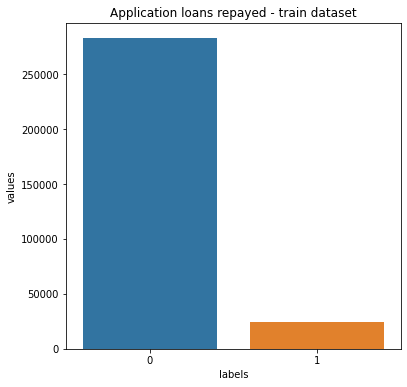

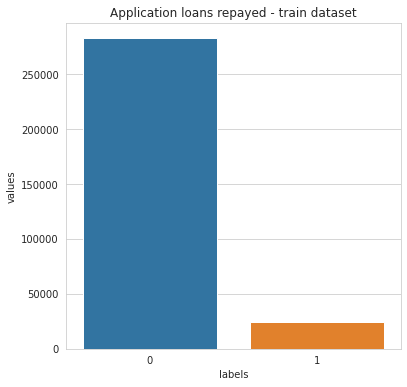

In [ ]:
### Balance of train set 

temp = application_train["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('Application loans repayed - train dataset')
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

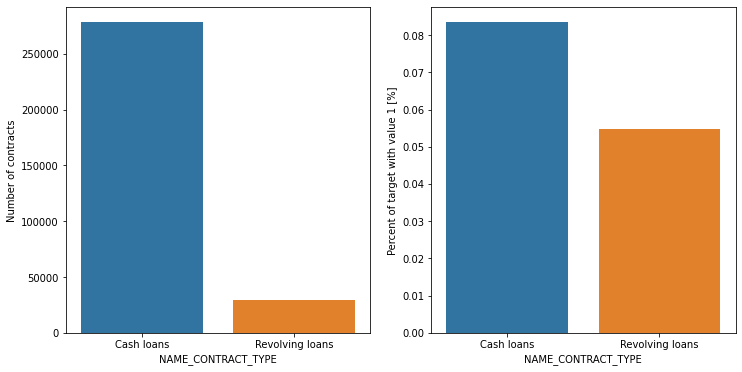

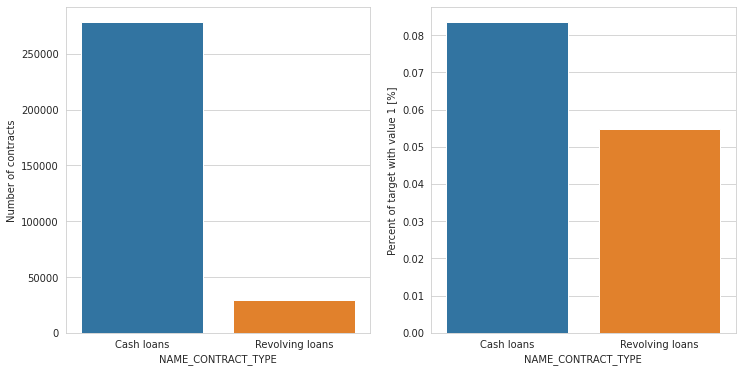

In [ ]:
plot_stats('NAME_CONTRACT_TYPE')

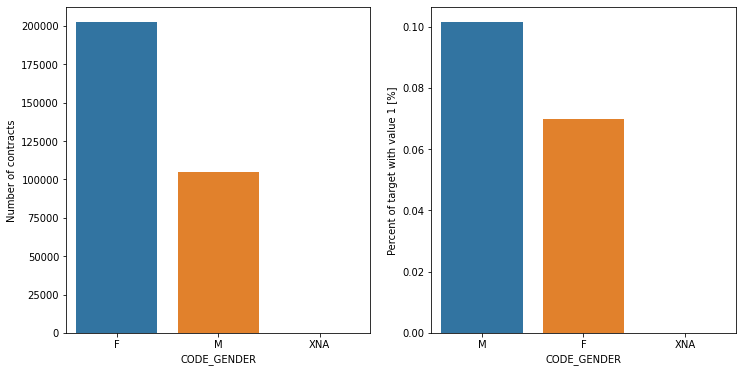

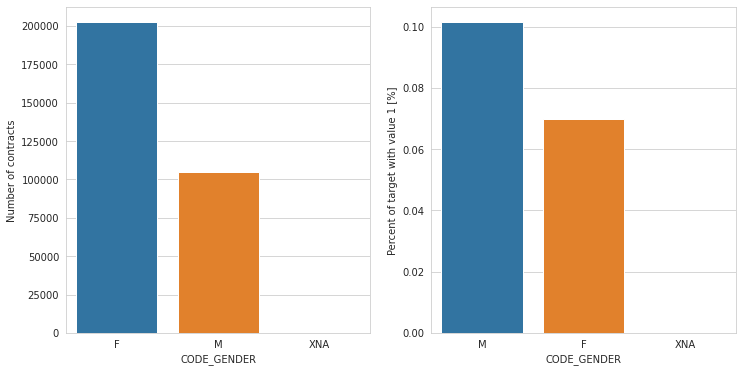

In [ ]:
plot_stats('CODE_GENDER')

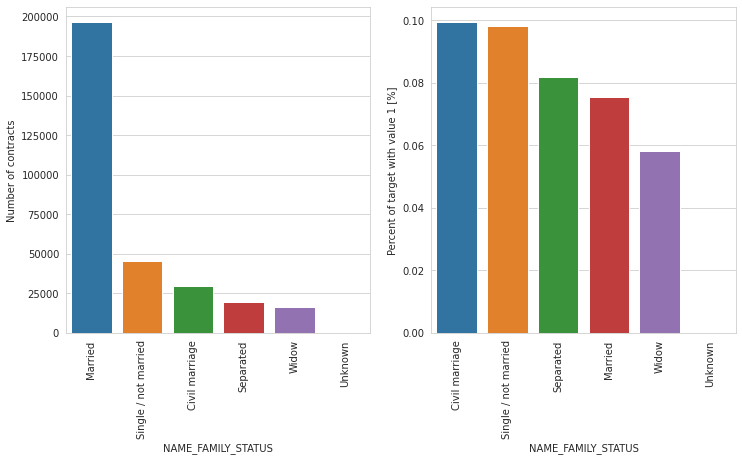

In [ ]:
plot_stats('NAME_FAMILY_STATUS',True, True)

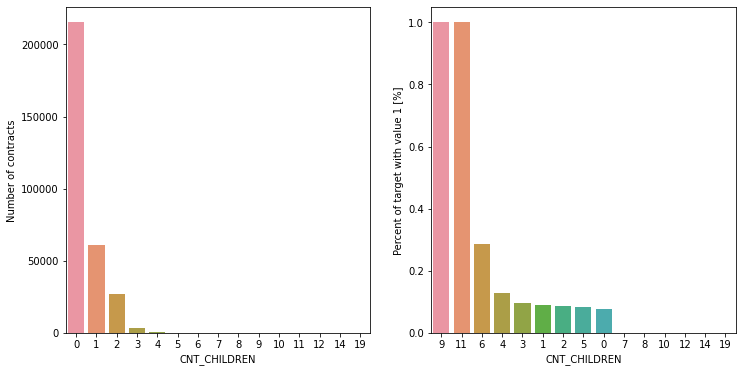

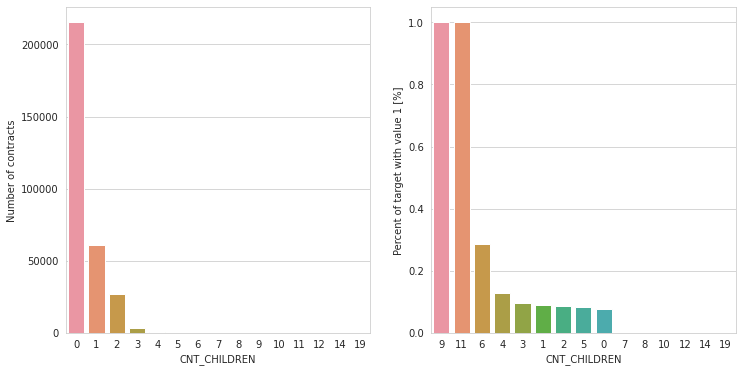

In [ ]:
plot_stats('CNT_CHILDREN')

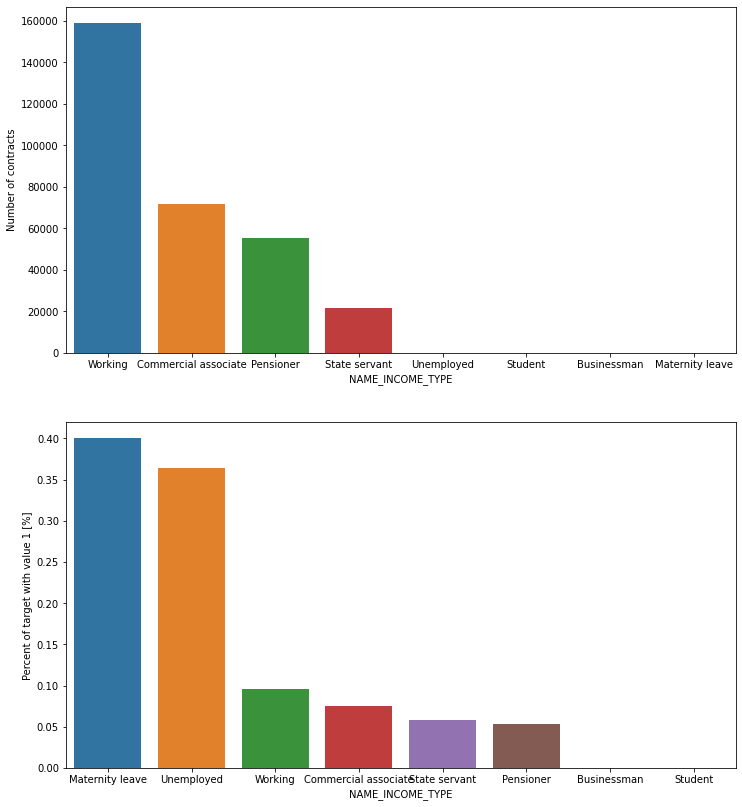

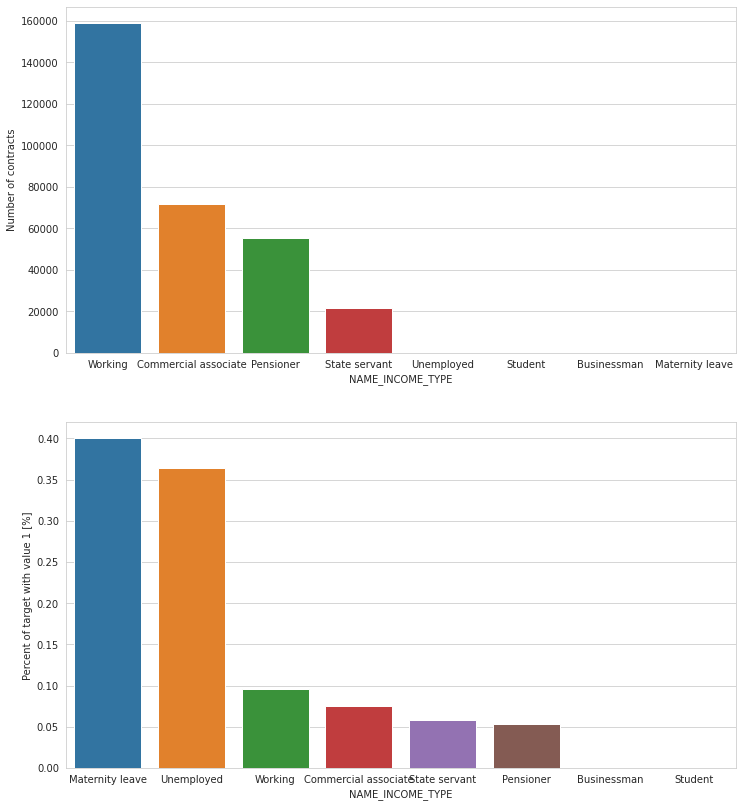

In [ ]:
plot_stats('NAME_INCOME_TYPE',False,False)

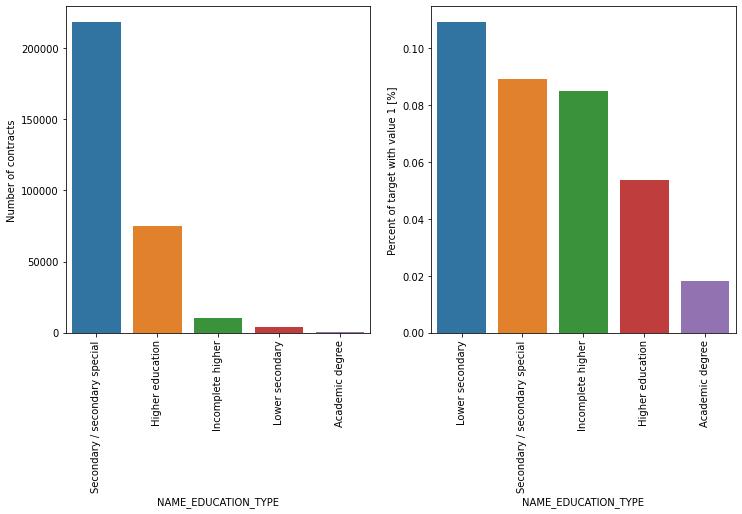

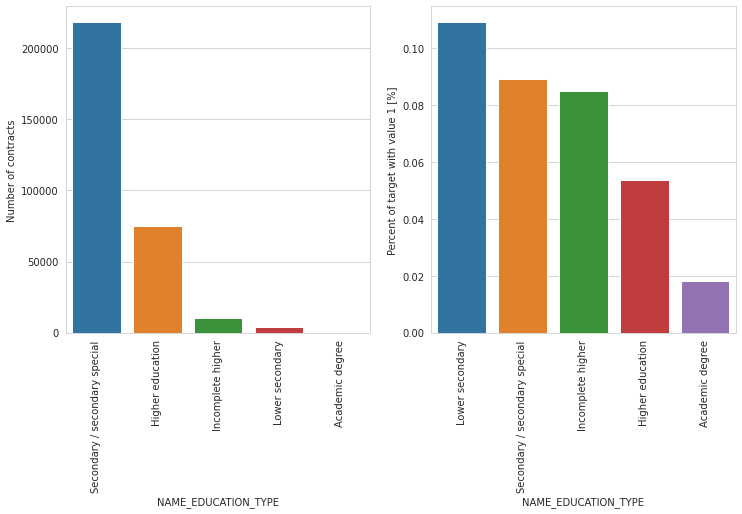

In [ ]:
plot_stats('NAME_EDUCATION_TYPE',True)

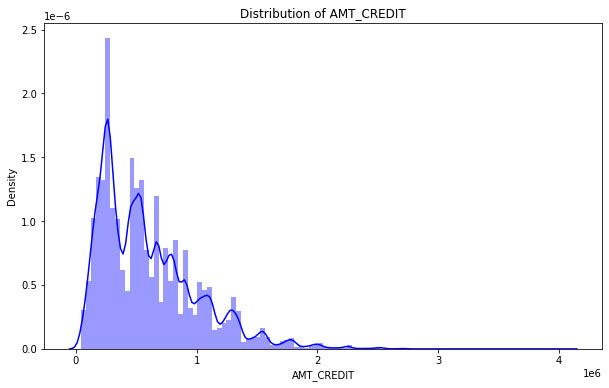

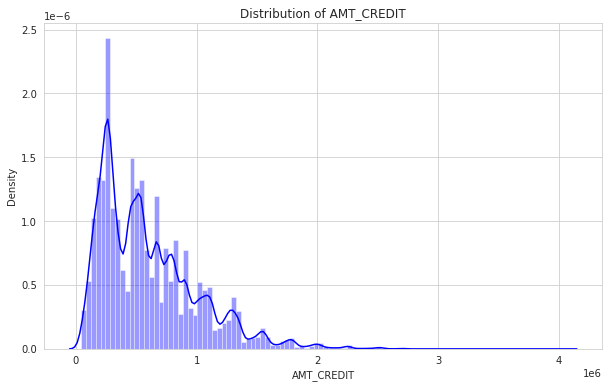

In [ ]:
plot_distribution('AMT_CREDIT','blue')

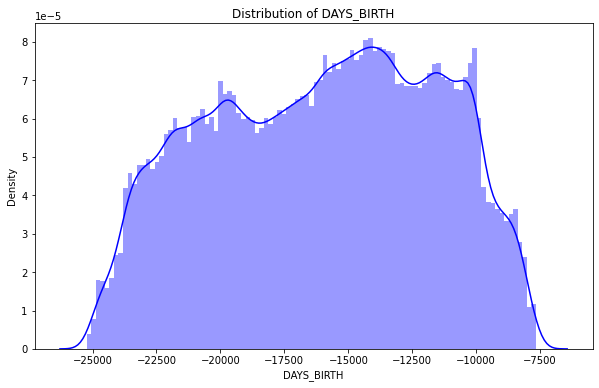

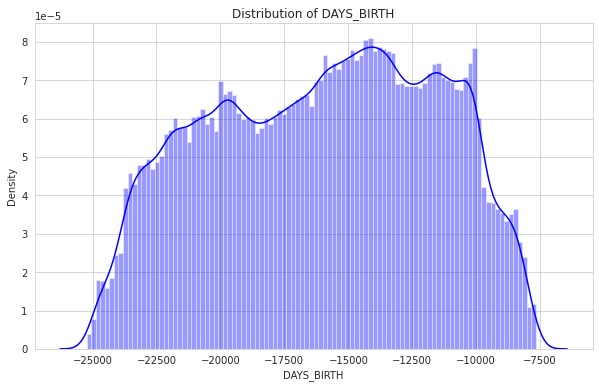

In [ ]:
plot_distribution('DAYS_BIRTH','blue')

<Figure size 432x288 with 0 Axes>

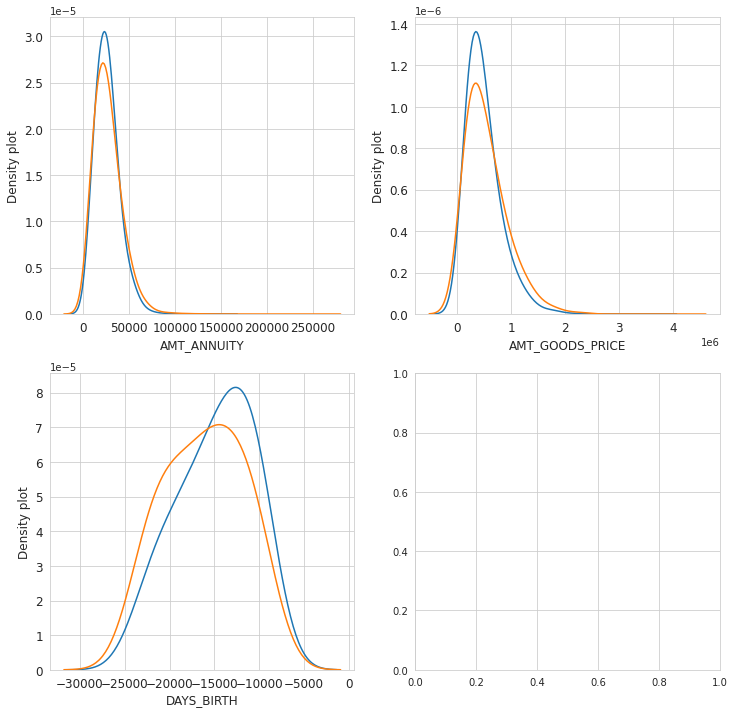

In [ ]:
var = ['AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH']
plot_distribution_comp(var,nrow=2)

In [ ]:
temp_corr = application_train.corr("pearson")
fig = px.imshow(temp_corr, aspect="auto", title = "Pearson correlation of application_train dataset")
fig.show()

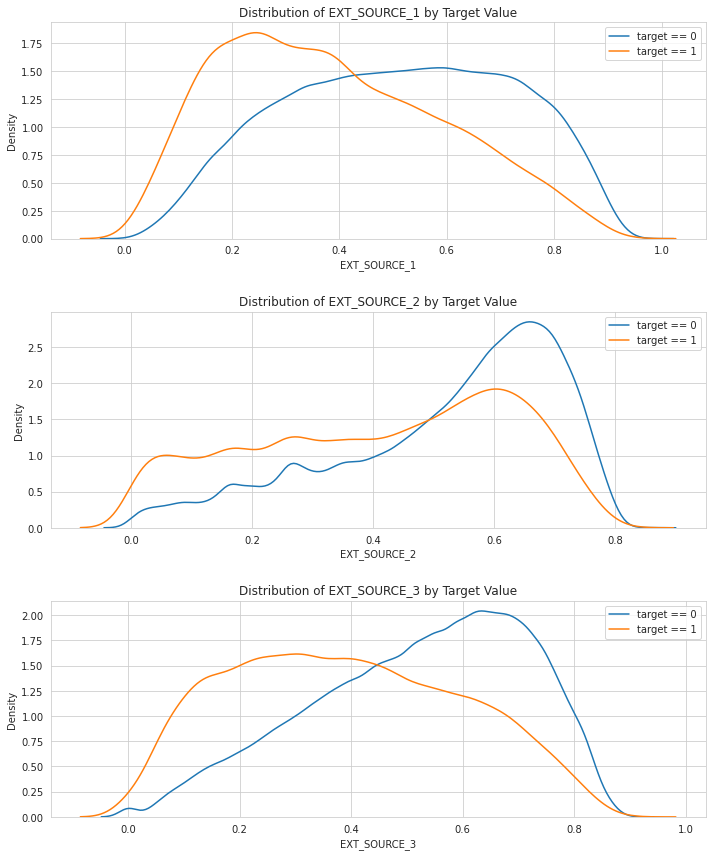

In [ ]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(application_train.loc[application_train['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(application_train.loc[application_train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
    plt.legend()
    
plt.tight_layout(h_pad = 2.5)